In [ ]:
# Dictionary that stores state to their abbreviations
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [ ]:
# Load donations data
import pandas as pd
file_path = '/content/drive/My Drive/Kaden/Projects/political_donations/individual_donations.txt'
col_names = ["CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID"]
donations = pd.read_csv(file_path, sep = "|", names = col_names)

<ipython-input-2-acc67f64ff57>:5: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  donations = pd.read_csv(file_path, sep = "|", names = col_names)


In [ ]:
# Data cleaning
donations = donations[["TRANSACTION_PGI", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_AMT"]]
donations = donations.dropna()
donations = donations.reset_index(drop = True)
donations.head()

,TRANSACTION_PGI,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_AMT
0,P,15E,IND,"EHLMANN, BILL",MONTEREY,TN,38574,RETIRED,RETIRED,47
1,P,15E,IND,"EISEL, KATHY",PITTSBURGH,PA,15210,RETIRED,RETIRED,30
2,P,15E,IND,"COUTONUNEZ, MERCEDES",SPRING HOPE,NC,27882,RETIRED,RETIRED,47
3,P,15E,IND,"COURSON PATE, DONNA",CARLSBAD,NM,88221,RETIRED,RETIRED,24
4,P,15E,IND,"COURTNEY, ANGELA",COLUMBUS,OH,43220,ARTISTRY SMILE,DENTISTRY,50


In [ ]:
# Convert city and states to county
location = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/us_cities_states_counties.csv", sep = "|")
location.head()

,City,State short,State full,County,City alias
0,Holtsville,NY,New York,SUFFOLK,Internal Revenue Service
1,Holtsville,NY,New York,SUFFOLK,Holtsville
2,Adjuntas,PR,Puerto Rico,ADJUNTAS,URB San Joaquin
3,Adjuntas,PR,Puerto Rico,ADJUNTAS,Jard De Adjuntas
4,Adjuntas,PR,Puerto Rico,ADJUNTAS,Colinas Del Gigante


In [ ]:
location = location[["City", "State short", "County"]]
location["City"] = location["City"].str.lower()
location["location"] = location["City"] + ", " + location["State short"]
location = location.drop_duplicates()

donations["CITY"] = donations["CITY"].str.lower()
donations["location"] = donations["CITY"] + ", " + donations["STATE"]

<ipython-input-5-4ce92871faa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["City"] = location["City"].str.lower()
<ipython-input-5-4ce92871faa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location["location"] = location["City"] + ", " + location["State short"]


In [ ]:
donations = pd.merge(donations, location, how = "left", on = "location")
donations = donations.drop(columns = ["City", "State short"])
donations["County"] = donations["County"] + ", " + donations["STATE"]
donations.head()

,TRANSACTION_PGI,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,location,County
0,P,15E,IND,"EHLMANN, BILL",monterey,TN,38574,RETIRED,RETIRED,47,"monterey, TN","PUTNAM, TN"
1,P,15E,IND,"EISEL, KATHY",pittsburgh,PA,15210,RETIRED,RETIRED,30,"pittsburgh, PA","ALLEGHENY, PA"
2,P,15E,IND,"COUTONUNEZ, MERCEDES",spring hope,NC,27882,RETIRED,RETIRED,47,"spring hope, NC","NASH, NC"
3,P,15E,IND,"COURSON PATE, DONNA",carlsbad,NM,88221,RETIRED,RETIRED,24,"carlsbad, NM","EDDY, NM"
4,P,15E,IND,"COURTNEY, ANGELA",columbus,OH,43220,ARTISTRY SMILE,DENTISTRY,50,"columbus, OH","FRANKLIN, OH"


In [ ]:
"""
The practical questions:
From a democrat or republican standpoint, which counties should I target to raise money? What are the conditions in these counties?
Who is contributing this money? Elon Musk is now the number one individual contributor? Who else is a major contributor?
Proportion of comopany to individual contributors?
What types of donations are most prevalent?
"""

import seaborn as sns
import matplotlib.pyplot as plt

# Top individual donors
donors = donations.groupby(["NAME"])["TRANSACTION_AMT"].sum()
donors = donors.sort_values(ascending = False)
donors.head(10)

,TRANSACTION_AMT
NAME,
"MELLON, TIMOTHY",165029300
"YASS, JEFF",68888881
"GRIFFIN, KENNETH C.",50990948
"UIHLEIN, RICHARD",42938511
"HOFFMAN, REID",31261000
"HOROWITZ, BEN",25148615
"HASTINGS, REED",24967591
"ANDREESSEN, MARC",24761998
"BLOOMBERG, MICHAEL",24321813


In [ ]:
len(donors)

2827688

In [ ]:
import numpy as np

In [ ]:
donors = donors.reset_index()
donors

,NAME,TRANSACTION_AMT
0,"MELLON, TIMOTHY",165029300
1,"YASS, JEFF",68888881
2,"GRIFFIN, KENNETH C.",50990948
3,"UIHLEIN, RICHARD",42938511
4,"HOFFMAN, REID",31261000
...,...,...
2827683,"GREER, H",-10000
2827684,"HOLDERMAN, RAYMOND H.",-12311
2827685,DREAM FINDERS HOMES,-13200
2827686,"THOMPSON, SANDRA ANN",-19700


In [ ]:
sum(donors["TRANSACTION_AMT"][:int(np.floor(len(donors) * 0.05))]) / donors["TRANSACTION_AMT"].sum()

0.7065783051349187

In [ ]:
# The top 5% of donors accounted for 71% of total donations

In [ ]:
# Distribution of entity types
entity_contributions = donations.groupby("ENTITY_TP")["TRANSACTION_AMT"].sum()
entity_contributions = entity_contributions.sort_values(ascending = False)
entity_contributions

,TRANSACTION_AMT
ENTITY_TP,
IND,9790046387
CAN,78388639
ORG,5157201
COM,3250
PAC,224


In [ ]:
# Distribution of transaction types
transaction_contributions = donations.groupby("TRANSACTION_TP")["TRANSACTION_AMT"].sum()
transaction_contributions = transaction_contributions.sort_values(ascending = False)
transaction_contributions = transaction_contributions.reset_index()
transaction_contributions

,TRANSACTION_TP,TRANSACTION_AMT
0,15,3284933379
1,15E,2545908226
2,10,1946556773
3,24T,1926015758
4,15C,78615916
5,32,39462754
6,31,34988635
7,30,6074758
8,24I,5476144
9,31E,2689201


In [ ]:
# Top transaction types
# 1. Contributions to political committees (non Super and Hybrid PACs)
# 2. Earmarked contributions to political committess (non Super and Hybrid PACs)
# 3. Contribution to Independent Expenditure-Only Committees (Super PACs), (Hybrid PACs) and nonfederal party "soft money" accounts
# 4. Earmarked contribution passed to intended recipient from intermediary's treasury (treasury out)

In [ ]:
transaction_contributions["TRANSACTION_AMT"][:4].sum() / transaction_contributions["TRANSACTION_AMT"].sum()

0.982763972705226

In [ ]:
# These 4 transaction types accounted for 98% of total contributions

In [ ]:
# Number of donations for each county
county_counts = donations["County"].value_counts()
county_counts = county_counts.sort_values(ascending = False)
county_counts.head(10)

,count
County,
"LOS ANGELES, CA",1081102
"MARICOPA, AZ",601518
"NEW YORK, NY",574075
"HARRIS, TX",527023
"COOK, IL",511969
"SAN DIEGO, CA",500517
"KING, WA",497469
"FORT BEND, TX",450434
"ORANGE, CA",433710


In [ ]:
# Sum of donations for each county
county_sums = donations.groupby("County")["TRANSACTION_AMT"].sum()
county_sums = county_sums.sort_values(ascending = False)
county_sums.head(10)

,TRANSACTION_AMT
County,
"NEW YORK, NY",542368375
"LOS ANGELES, CA",376146575
"SAN MATEO, CA",327383405
"COOK, IL",224508918
"PALM BEACH, FL",205058837
"DISTRICT OF COLUMBIA, DC",171340066
"SAN FRANCISCO, CA",166229922
"CARBON, WY",165186982
"SANTA CLARA, CA",153666755


In [ ]:
# Average donation amount for each county
county_means = donations.groupby("County")["TRANSACTION_AMT"].mean()
county_means = county_means.sort_values(ascending = False)
county_means.head(10)

,TRANSACTION_AMT
County,
"CARBON, WY",57237.346500
"POWDER RIVER, MT",5890.558442
"ALLENDALE, SC",5120.433962
"WINN, LA",3049.442177
"PITKIN, CO",2474.552577
"RICHARDSON, NE",2372.964646
"BORDEN, TX",2206.000000
"JACKSON, IN",2199.448302
"DORADO, PR",2160.447484


In [ ]:
# County donations data
county_donations = pd.merge(county_counts, county_sums, on = "County")
county_donations = pd.merge(county_donations, county_means, on = "County")
county_donations = county_donations.rename(columns = {"count" : "Count", "TRANSACTION_AMT_x" : "Total Donations", "TRANSACTION_AMT_y" : "Mean Donations"})
county_donations = county_donations.reset_index()
county_donations

,County,Count,Total Donations,Mean Donations
0,"LOS ANGELES, CA",1081102,376146575,347.928849
1,"MARICOPA, AZ",601518,85828205,142.686013
2,"NEW YORK, NY",574075,542368375,944.769194
3,"HARRIS, TX",527023,133971644,254.204549
4,"COOK, IL",511969,224508918,438.520532
...,...,...,...,...
3217,"MAUNABO, PR",2,750,375.000000
3218,"LAS MARIAS, PR",2,500,250.000000
3219,"ARROYO, PR",2,750,375.000000
3220,"WHEELER, NE",2,1600,800.000000


In [ ]:
# Number of donations for each employer
employer_counts = donations["EMPLOYER"].value_counts()
employer_counts = employer_counts.sort_values(ascending = False)
employer_counts.head(10)

,count
EMPLOYER,
RETIRED,13292126
NOT EMPLOYED,10289489
NONE,1351848
SELF-EMPLOYED,1214084
SELF,758671
SELF EMPLOYED,678881
NORTHROP GRUMMAN CORPORATION,119557
HOMEMAKER,82364
LDC AND AFFILIATED LOCALS,75515


In [ ]:
# Sum of donations for each employer
employer_sums = donations.groupby("EMPLOYER")["TRANSACTION_AMT"].sum()
employer_sums = employer_sums.sort_values(ascending = False)
employer_sums.head(10)

,TRANSACTION_AMT
EMPLOYER,
NOT EMPLOYED,1523788375
RETIRED,1309037215
SELF-EMPLOYED,571579594
SELF EMPLOYED,304107148
SELF,222733504
NONE,154714074
HOMEMAKER,95833232
ULINE,68624833
SIG,64720457


In [ ]:
# Number of donations for each occupation
occupation_counts = donations["OCCUPATION"].value_counts()
occupation_counts = occupation_counts.sort_values(ascending = False)
occupation_counts.head(10)

,count
OCCUPATION,
RETIRED,14369582
NOT EMPLOYED,10442802
ATTORNEY,737103
PHYSICIAN,496956
ENGINEER,346092
CONSULTANT,293954
PROFESSOR,282408
TEACHER,227558
CEO,204452


In [ ]:
# Sum of donations for each occupation
occupation_sums = donations.groupby("OCCUPATION")["TRANSACTION_AMT"].sum()
occupation_sums = occupation_sums.sort_values(ascending = False)
occupation_sums.head(10)

,TRANSACTION_AMT
OCCUPATION,
RETIRED,1532367761
NOT EMPLOYED,1416067081
CEO,490898174
ATTORNEY,394595526
PRESIDENT,268622906
INVESTOR,230293089
EXECUTIVE,218325737
CHAIRMAN,189963349
PHYSICIAN,175359125


In [ ]:
# Build dataset of economic factors
gdp = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/GDP_data.csv", encoding = "latin-1")
gdp.head()

,GeoFIPS,GeoName,LineCode,Description,Unit,Real GDP (thousands of chained 2017 dollars)
0,0,United States,1,Real GDP (thousands of chained 2017 dollars),Thousands of chained 2017 dollars,2.182204e+10
1,0,United States,2,Chain-type quantity indexes for real GDP,Quantity index,1.112680e+02
2,0,United States,3,Current-dollar GDP (thousands of current dolla...,Thousands of dollars,2.574411e+10
3,1000,Alabama,1,Real GDP (thousands of chained 2017 dollars),Thousands of chained 2017 dollars,2.358073e+08
4,1000,Alabama,2,Chain-type quantity indexes for real GDP,Quantity index,1.088600e+02


In [ ]:
gdp = gdp.loc[gdp["LineCode"] == 1]
gdp = gdp.drop(columns = ["LineCode", "Description", "Unit", "GeoFIPS"])
gdp = gdp.reset_index(drop = True)
gdp["Real GDP (thousands of chained 2017 dollars)"] = gdp["Real GDP (thousands of chained 2017 dollars)"].fillna(gdp["Real GDP (thousands of chained 2017 dollars)"].mean())
gdp = gdp.rename(columns = {"GeoName": "County"})
gdp.head()

,County,Real GDP (thousands of chained 2017 dollars)
0,United States,2.182204e+10
1,Alabama,2.358073e+08
2,"Autauga, AL",1.929264e+06
3,"Baldwin, AL",8.924207e+06
4,"Barbour, AL",7.453490e+05


In [ ]:
personal_income = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/personal_income_data.csv", encoding = "latin-1")
personal_income.head()

,GeoFIPS,GeoName,LineCode,IndustryClassification,Description,Unit,Personal Income (thousands of dollars)
0,"""01000""",Alabama,10,...,Personal income (thousands of dollars),Thousands of dollars,276925551.0
1,"""01000""",Alabama,45,...,Net earnings by place of residence,Thousands of dollars,159356296.0
2,"""01000""",Alabama,50,...,Personal current transfer receipts,Thousands of dollars,66543602.0
3,"""01000""",Alabama,60,...,Income maintenance benefits 1/,Thousands of dollars,5923059.0
4,"""01000""",Alabama,70,...,Unemployment insurance compensation,Thousands of dollars,83126.0


In [ ]:
personal_income = personal_income.loc[personal_income["LineCode"] == 10]
personal_income = personal_income.drop(columns = ["LineCode", "IndustryClassification", "Description", "Unit", "GeoFIPS"])
personal_income = personal_income.reset_index(drop = True)
personal_income["Personal Income (thousands of dollars)"] = personal_income["Personal Income (thousands of dollars)"].fillna(personal_income["Personal Income (thousands of dollars)"].mean())
personal_income = personal_income.rename(columns = {"GeoName": "County"})

In [ ]:
poverty = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/poverty_data.csv", encoding = "latin-1")
poverty.head()

,ï»¿State,Area_name,POVALL_2021,MEDHHINC_2021
0,US,United States,41393176.0,69717.0
1,AL,Alabama,800848.0,53990.0
2,AL,Autauga,6296.0,66444.0
3,AL,Baldwin,25526.0,65658.0
4,AL,Barbour,5089.0,38649.0


In [ ]:
poverty["County"] = poverty["Area_name"] + ", " + poverty["ï»¿State"]
poverty["POVALL_2021"] = poverty["POVALL_2021"].fillna(poverty["POVALL_2021"].mean())
poverty["MEDHHINC_2021"] = poverty["MEDHHINC_2021"].fillna(poverty["MEDHHINC_2021"].mean())
poverty = poverty.drop(columns = ["ï»¿State", "Area_name"])

In [ ]:
poverty.head()

,POVALL_2021,MEDHHINC_2021,County
0,41393176.0,69717.0,"United States, US"
1,800848.0,53990.0,"Alabama, AL"
2,6296.0,66444.0,"Autauga, AL"
3,25526.0,65658.0,"Baldwin, AL"
4,5089.0,38649.0,"Barbour, AL"


In [ ]:
unemployment = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/unemployment_data.csv", encoding = "latin-1")
unemployment.head()

,ï»¿FIPS_Code,State,Area_Name,Unemployment_rate_2021
0,1000,AL,Alabama,3.4
1,1001,AL,"Autauga, AL",2.8
2,1003,AL,"Baldwin, AL",2.9
3,1005,AL,"Barbour, AL",5.5
4,1007,AL,"Bibb, AL",3.4


In [ ]:
unemployment["Unemployment_rate_2021"] = unemployment["Unemployment_rate_2021"].fillna(unemployment["Unemployment_rate_2021"].mean())
unemployment = unemployment.rename(columns = {"Area_Name": "County"})
unemployment = unemployment.drop(columns = ["ï»¿FIPS_Code", "State"])
unemployment = unemployment.reset_index(drop = True)

In [ ]:
population = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/population_data.csv", encoding = "latin-1")
population = population[["ï»¿State", "Area_Name", "POP_ESTIMATE_2023"]]
population["POP_ESTIMATE_2023"] = population["POP_ESTIMATE_2023"].fillna(population["POP_ESTIMATE_2023"].mean())
population.head()

,ï»¿State,Area_Name,POP_ESTIMATE_2023
0,US,United States,334914895.0
1,AL,Alabama,5108468.0
2,AL,Autauga,60342.0
3,AL,Baldwin,253507.0
4,AL,Barbour,24585.0


In [ ]:
population["County"] = population["Area_Name"] + ", " + population["ï»¿State"]
population = population.drop(columns = ["ï»¿State", "Area_Name"])
population.head()

,POP_ESTIMATE_2023,County
0,334914895.0,"United States, US"
1,5108468.0,"Alabama, AL"
2,60342.0,"Autauga, AL"
3,253507.0,"Baldwin, AL"
4,24585.0,"Barbour, AL"


In [ ]:
# Merge economic data with donations datset
economy = pd.merge(gdp, personal_income, on = "County")
economy = pd.merge(economy, poverty, on = "County")
economy = pd.merge(economy, unemployment, on = "County")
economy = pd.merge(economy, population, on = "County")

economy["County"] = economy["County"].str.upper()
county_statistics = pd.merge(county_donations, economy, on = "County")
county_statistics

,County,Count,Total Donations,Mean Donations,Real GDP (thousands of chained 2017 dollars),Personal Income (thousands of dollars),POVALL_2021,MEDHHINC_2021,Unemployment_rate_2021,POP_ESTIMATE_2023
0,"LOS ANGELES, CA",1081102,376146575,347.928849,790016435.0,756659481.0,1365808.0,77356.0,8.9,9663345.0
1,"MARICOPA, AZ",601518,85828205,142.686013,298240414.0,312350417.0,502224.0,76230.0,4.6,4585871.0
2,"NEW YORK, NY",574075,542368375,944.769194,780965530.0,343437442.0,264938.0,84371.0,7.7,1597451.0
3,"HARRIS, TX",527023,133971644,254.204549,402792333.0,357130669.0,767505.0,63539.0,6.4,4835125.0
4,"COOK, IL",511969,224508918,438.520532,417565020.0,396470899.0,703874.0,72063.0,6.9,5087072.0
...,...,...,...,...,...,...,...,...,...,...
2925,"DEUEL, NE",5,1532,306.400000,85853.0,89986.0,207.0,51583.0,2.2,1871.0
2926,"KING, TX",5,6600,1320.000000,63481.0,30342.0,30.0,74890.0,0.9,217.0
2927,"BORDEN, TX",5,11030,2206.000000,464480.0,89043.0,61.0,69744.0,2.3,572.0
2928,"MCPHERSON, NE",5,205,41.000000,16422.0,32953.0,43.0,54138.0,1.8,383.0


In [ ]:
# Feature engineering
county_statistics = county_statistics.rename(columns = {"Count" : "Number of Donations", "Total Donations" : "Total Donations", "Mean Donations" : "Mean Donations", "Real GDP (thousands of chained 2017 dollars)" : "Real GDP", "Personal Income (thousands of dollars)" : "Personal Income", "POVALL_2021" : "Poverty Count", "MEDHHINC_2021" : "Median Household Income", "Unemployment_rate_2021" : "Unemployment Rate", "POP_ESTIMATE_2023" : "Population"})
county_statistics["Real GDP per Capita"] = county_statistics["Real GDP"] / county_statistics["Population"]
county_statistics["Personal Income per Capita"] = county_statistics["Personal Income"] / county_statistics["Population"]
county_statistics["Poverty Rate"] = county_statistics["Poverty Count"] / county_statistics["Population"]
county_statistics.head()

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,Real GDP per Capita,Personal Income per Capita,Poverty Rate
0,"LOS ANGELES, CA",1081102,376146575,347.928849,790016435.0,756659481.0,1365808.0,77356.0,8.9,9663345.0,81.753930,78.302025,0.141339
1,"MARICOPA, AZ",601518,85828205,142.686013,298240414.0,312350417.0,502224.0,76230.0,4.6,4585871.0,65.034628,68.111470,0.109516
2,"NEW YORK, NY",574075,542368375,944.769194,780965530.0,343437442.0,264938.0,84371.0,7.7,1597451.0,488.882307,214.990909,0.165850
3,"HARRIS, TX",527023,133971644,254.204549,402792333.0,357130669.0,767505.0,63539.0,6.4,4835125.0,83.305464,73.861724,0.158735
4,"COOK, IL",511969,224508918,438.520532,417565020.0,396470899.0,703874.0,72063.0,6.9,5087072.0,82.083568,77.936954,0.138365


Text(0, 0.5, 'Mean Donations')

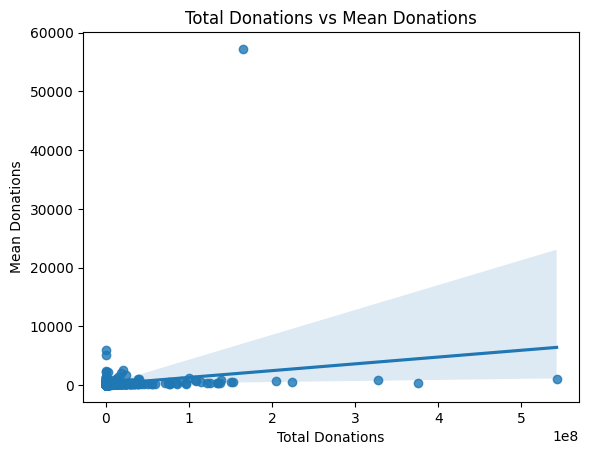

In [ ]:
# Visualize Total and Mean Donations
sns.regplot(data = county_statistics, x = "Total Donations", y = "Mean Donations")
plt.title("Total Donations vs Mean Donations")
plt.xlabel("Total Donations")
plt.ylabel("Mean Donations")

In [ ]:
# Let's investigate the outlier at $60000 mean donations
outlier = county_statistics.loc[county_statistics["Mean Donations"] == county_statistics["Mean Donations"].max()]
outlier = outlier.reset_index(drop = True)
outlier

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,Real GDP per Capita,Personal Income per Capita,Poverty Rate
0,"CARBON, WY",2886,165186982,57237.3465,1197069.0,982184.0,1706.0,63984.0,4.1,14334.0,83.512558,68.521278,0.119018


In [ ]:
# Are any other variables especially high?
for column in county_statistics.columns:
  if column != "County":
    z_score = (outlier[column].iloc[0] - county_statistics[column].mean()) / county_statistics[column].std()
    print(f"{column}, z-score: {z_score}")

Number of Donations, z-score: -0.20498892025957877
Total Donations, z-score: 8.86128075728535
Mean Donations, z-score: 53.0943463639783
Real GDP, z-score: -0.1782620759565021
Personal Income, z-score: -0.23325724280954171
Poverty Count, z-score: -0.2487638708090282
Median Household Income, z-score: 0.3535003234273242
Unemployment Rate, z-score: -0.2935049192696046
Population, z-score: -0.2689870904474297
Real GDP per Capita, z-score: -0.0040076839573926
Personal Income per Capita, z-score: 0.5250338000965356
Poverty Rate, z-score: -0.38713935115959314


In [ ]:
# Mean Donations has a high z-score relative to that of all other factors. So let's remove this outlier
county_statistics = county_statistics.drop(county_statistics.loc[county_statistics["Mean Donations"] == county_statistics["Mean Donations"].max()].index)
county_statistics = county_statistics.reset_index(drop = True)

In [ ]:
# Let's investigate the influential point at $5.5 * 10^7 total donations
influential = county_statistics.loc[county_statistics["Total Donations"] == county_statistics["Total Donations"].max()]
influential = influential.reset_index(drop = True)
influential

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,Real GDP per Capita,Personal Income per Capita,Poverty Rate
0,"NEW YORK, NY",574075,542368375,944.769194,780965530.0,343437442.0,264938.0,84371.0,7.7,1597451.0,488.882307,214.990909,0.16585


In [ ]:
# Are any other variables especially high?
for column in county_statistics.columns:
  if column != "County":
    z_score = (influential[column].iloc[0] - county_statistics[column].mean()) / county_statistics[column].std()
    print(f"{column}, z-score: {z_score}")

Number of Donations, z-score: 12.129981122034835
Total Donations, z-score: 29.85349222390324
Mean Donations, z-score: 3.87121290679096
Real GDP, z-score: 24.737053331398517
Personal Income, z-score: 12.26408438728369
Poverty Count, z-score: 5.547301506613773
Median Household Income, z-score: 1.729903953772642
Unemployment Rate, z-score: 1.8632180561341471
Population, z-score: 4.397153454901062
Real GDP per Capita, z-score: 0.16991695056695913
Personal Income per Capita, z-score: 7.722141394929527
Poverty Rate, z-score: 0.49137636380015837


In [ ]:
# Relative to Real GDP, total donations does not have a high z-score. So let's keep this point

Text(0, 0.5, 'Total Donations')

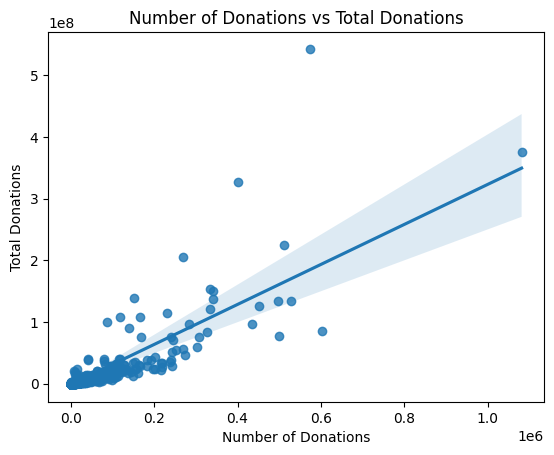

In [ ]:
# Visualize Number of and Total Donations
sns.regplot(data = county_statistics, x = "Number of Donations", y = "Total Donations")
plt.title("Number of Donations vs Total Donations")
plt.xlabel("Number of Donations")
plt.ylabel("Total Donations")

In [ ]:
# Investigate influential point at 1.1 * 10^5 donations
influential = county_statistics.loc[county_statistics["Number of Donations"] == county_statistics["Number of Donations"].max()]
influential = influential.reset_index(drop = True)
influential

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,Real GDP per Capita,Personal Income per Capita,Poverty Rate
0,"LOS ANGELES, CA",1081102,376146575,347.928849,790016435.0,756659481.0,1365808.0,77356.0,8.9,9663345.0,81.75393,78.302025,0.141339


In [ ]:
# Are any other variables especially high?
for column in county_statistics.columns:
  if column != "County":
    z_score = (influential[column].iloc[0] - county_statistics[column].mean()) / county_statistics[column].std()
    print(f"{column}, z-score: {z_score}")

Number of Donations, z-score: 23.079388999960262
Total Donations, z-score: 20.65645411465548
Mean Donations, z-score: 0.9940226936804332
Real GDP, z-score: 25.02624999443223
Personal Income, z-score: 27.34399398840868
Poverty Count, z-score: 29.787379140778455
Median Household Income, z-score: 1.2563180705933077
Unemployment Rate, z-score: 2.5821438480478496
Population, z-score: 28.17113355282203
Real GDP per Capita, z-score: -0.004762912969251318
Personal Income per Capita, z-score: 1.0057389943010595
Poverty Rate, z-score: 0.0315372501420622


In [ ]:
# Relative to Real GDP, Personal Income, Poverty County, and POpulation, Number of Donations does not have a high z-score. So let's keep this point.

<Axes: >

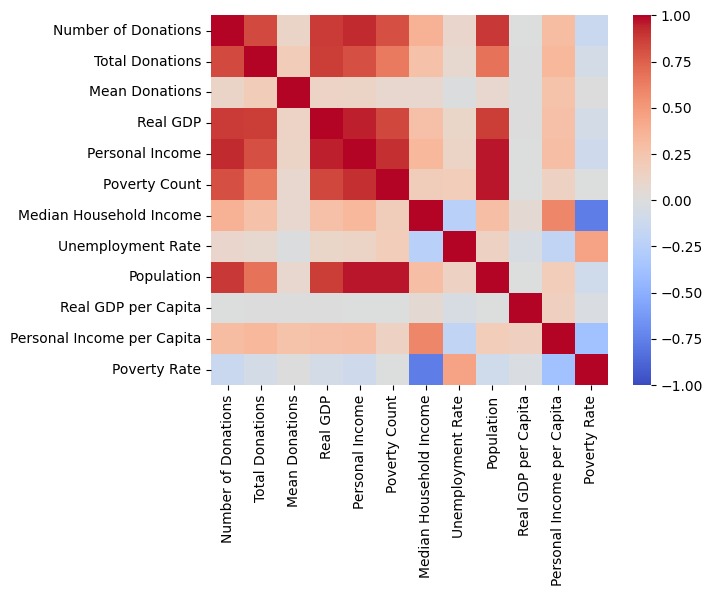

In [ ]:
# Visualize correlation between different features
sns.heatmap(county_statistics.drop("County", axis = 1).corr(), vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
"""
Pretty significant correlation for total donations and number of donations with our economic factors
However, not much for mean donations. This is probably because within a county, there a few extreme contributors that drive donations up.
These people aren't representative of general population
"""

"\nPretty significant correlation for total donations and number of donations with our economic factors\nHowever, not much for mean donations. This is probably because within a county, there a few extreme contributors that drive donations up.\nThese people aren't representative of general population\n"

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.regression.linear_model as sm

In [ ]:
# Backward elimination for feature selection
def backward_elimination(df, X, y):
  # add a column of ones as integer data type
  x = np.append(arr = np.ones((len(df), 1)).astype(int),
                values = X, axis = 1)
  # choose a Significance level usually 0.05, if p>0.05
  #  for the highest values parameter, remove that value
  x_opt = x[:, [i for i in range(len(X.columns))]]
  ols = sm.OLS(endog = y, exog = x_opt).fit()
  ols.summary()
  pvalues = ols.pvalues
  old_columns = X.columns
  X_filtered = X.copy()
  for i in range(1, len(pvalues)):
      if pvalues.iloc[i] > 0.05:
          X_filtered = X.drop(old_columns[i], axis = 1)
  return X_filtered

# Linear regression
def linear_regression(df, X, y):
  X_filtered = backward_elimination(df, X, y)
  X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size = 0.2, random_state = 42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  return y_test, y_pred, r2, mse

# Random forest regression
def random_forest_regression(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  model = RandomForestRegressor()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  return y_test, y_pred, r2, mse

# Gradient boost regression w/ grid search for hyperparameter tuning
def gradient_boost_regression(X, y):
  # Drop rows with missing values
  X = X[y.notnull()]
  y = y.dropna()
  # Reset indices
  X = X.reset_index(drop=True)
  y = y.reset_index(drop=True)
  # Split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Initialize model
  model = xgb.XGBRegressor()
  # Define parameter grid
  param_grid = {
      'n_estimators': [100, 200, 300],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.01, 0.05, 0.1],
      'subsample': [0.7, 0.8, 0.9],
      'colsample_bytree': [0.7, 0.8, 0.9]
  }
  # Perform Grid Search
  grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_grid,
      scoring='r2',
      cv=5,
      verbose=2,
      n_jobs=-1
  )
  grid_search.fit(X_train, y_train)
  # Evaluate the best model
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  # Calculate performance metrics
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return y_test, y_pred, r2, mse

def plot_residuals(y_test, y_pred):
  residuals = y_test - y_pred
  graph = sns.residplot(x = y_pred, y = residuals)
  return graph

In [ ]:
# Use economic factors to predict Number of Donations and Total donations
# Try linear regression, random forest regression, and gradient boost regression

# Number of Donations
# Linear regression
X = county_statistics[["Real GDP", "Personal Income", "Poverty Rate", "Median Household Income", "Population"]]
y = county_statistics["Number of Donations"]
y_test, y_pred, r2, mse = linear_regression(county_statistics, X, y)
print(f"Linear Regression: R^2 = {r2}, MSE = {mse}")

Linear Regression: R^2 = 0.8044366927984445, MSE = 164897835.4876348


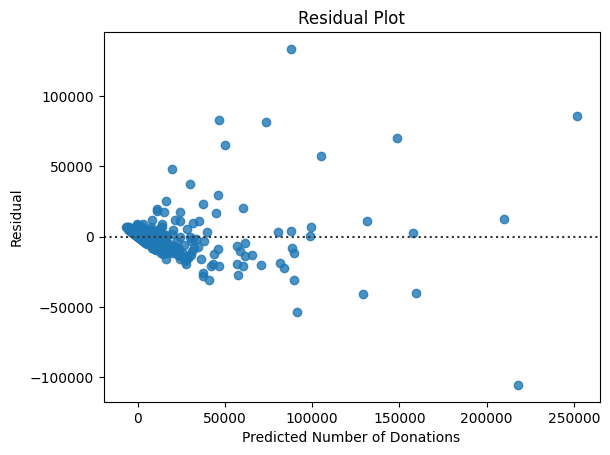

In [ ]:
# Plot residuals
plot_residuals(y_test, y_pred)
plt.xlabel("Predicted Number of Donations")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Random forest regression
y_test, y_pred, r2, mse = random_forest_regression(X, y)
print(f"Random Forest Regression: R^2 = {r2}, MSE = {mse}")

Random Forest Regression: R^2 = 0.7944223417555177, MSE = 173341877.6467809


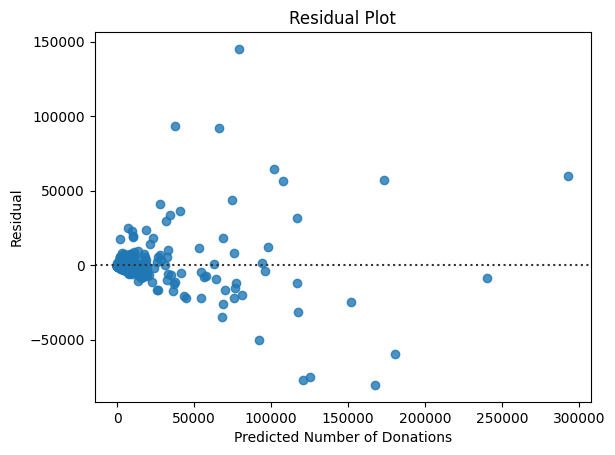

In [ ]:
# Plot residuals
plot_residuals(y_test, y_pred)
plt.xlabel("Predicted Number of Donations")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Gradient boost regression
y_test, y_pred, r2, mse = gradient_boost_regression(X, y)
print(f"Gradient Boost Regression: R^2 = {r2}, MSE = {mse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Gradient Boost Regression: R^2 = 0.821255087852478, MSE = 150716652.50571665


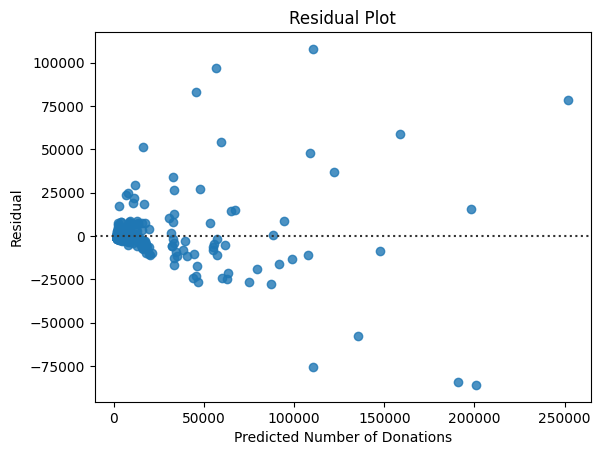

In [ ]:
# Plot residuals
plot_residuals(y_test, y_pred)
plt.xlabel("Predicted Number of Donations")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Total Donations
# Linear regression
X = county_statistics[["Real GDP", "Personal Income", "Poverty Rate", "Median Household Income", "Population"]]
y = county_statistics["Total Donations"]
y_test, y_pred, r2, mse = linear_regression(county_statistics, X, y)
print(f"Linear Regression: R^2 = {r2}, MSE = {mse}")

Linear Regression: R^2 = 0.7539000354904888, MSE = 19334117751677.973


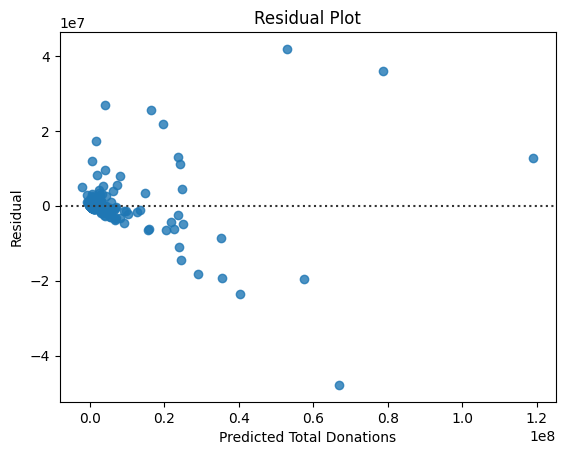

In [ ]:
# Plot residuals
plot_residuals(y_test, y_pred)
plt.xlabel("Predicted Total Donations")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Random forest regression
y_test, y_pred, r2, mse = random_forest_regression(X, y)
print(f"Random Forest Regression: R^2 = {r2}, MSE = {mse}")

Random Forest Regression: R^2 = 0.6690176425394989, MSE = 26002652562844.977


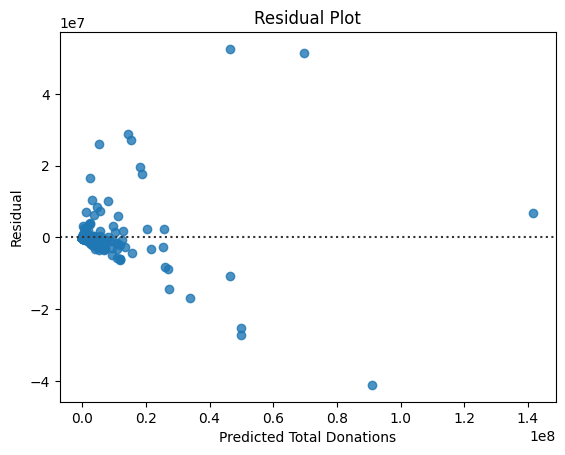

In [ ]:
# Plot residuals
plot_residuals(y_test, y_pred)
plt.xlabel("Predicted Total Donations")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Gradient boost regression
y_test, y_pred, r2, mse = gradient_boost_regression(X, y)
print(f"Gradient Boost Regression: R^2 = {r2}, MSE = {mse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Gradient Boost Regression: R^2 = 0.6765975952148438, MSE = 25407151583163.957


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


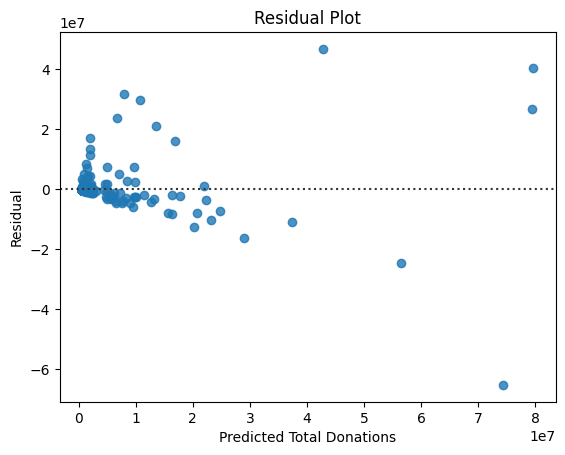

In [ ]:
# Plot residuals
plot_residuals(y_test, y_pred)
plt.xlabel("Predicted Total Donations")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Let's start investigating the effect of social factors
education = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/education_data.csv", encoding = "latin-1")
education.head()

,ï»¿State,Area name,"Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,US,United States,10.9,26.4,28.5,34.3
1,AL,Alabama,12.3,30.4,30.1,27.2
2,AL,Autauga,9.6,31.1,29.7,29.6
3,AL,Baldwin,8.4,27.8,31.3,32.6
4,AL,Barbour,23.5,36.8,27.8,11.9


In [ ]:
education["Area name"] = education["Area name"].str.upper()
education["County"] = education["Area name"] + ", " + education["ï»¿State"]
education["County"] = education["County"].str.upper()
education = education[["County", "Percent of adults with a bachelor's degree or higher, 2018-22"]]
education = education.rename(columns = {"Percent of adults with a bachelor's degree or higher, 2018-22" : "Bachelor's Degree or Higher"})
education["Bachelor's Degree or Higher"] = education["Bachelor's Degree or Higher"].fillna(education["Bachelor's Degree or Higher"].mean())
education.head()

,County,Bachelor's Degree or Higher
0,"UNITED STATES, US",34.3
1,"ALABAMA, AL",27.2
2,"AUTAUGA, AL",29.6
3,"BALDWIN, AL",32.6
4,"BARBOUR, AL",11.9


In [ ]:
education.head()

,County,Bachelor's Degree or Higher
0,"UNITED STATES, US",34.3
1,"ALABAMA, AL",27.2
2,"AUTAUGA, AL",29.6
3,"BALDWIN, AL",32.6
4,"BARBOUR, AL",11.9


In [ ]:
voting_age_pop = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/voting_age_population_data.csv", encoding = "latin-1")
voting_age_pop.head()

,geoname,cvap_est
0,"Autauga, Alabama",44355
1,"Baldwin, Alabama",180460
2,"Barbour, Alabama",19305
3,"Bibb, Alabama",17420
4,"Blount, Alabama",43700


In [ ]:
voting_age_pop = voting_age_pop.rename(columns = {"geoname" : "County", "cvap_est" : "Voting Age Population"})

# Extract state part from the "County" column
voting_age_pop["State"] = voting_age_pop["County"].str.extract(r",\s*(\w+)$")

# Convert state names to abbreviations
voting_age_pop["State"] = voting_age_pop["State"].map(us_state_to_abbrev)

# Remove the state name from the "County" column and append the abbreviation
voting_age_pop["County"] = voting_age_pop["County"].str.extract(r"^(.*?),")[0] + ", " + voting_age_pop["State"]

voting_age_pop["County"] = voting_age_pop["County"].str.upper()
voting_age_pop["Voting Age Population"] = voting_age_pop["Voting Age Population"].fillna(voting_age_pop["Voting Age Population"].mean())
voting_age_pop = voting_age_pop.dropna()
voting_age_pop = voting_age_pop.reset_index()
voting_age_pop

,index,County,Voting Age Population,State
0,0,"AUTAUGA, AL",44355,AL
1,1,"BALDWIN, AL",180460,AL
2,2,"BARBOUR, AL",19305,AL
3,3,"BIBB, AL",17420,AL
4,4,"BLOUNT, AL",43700,AL
...,...,...,...,...
2687,3139,"SWEETWATER, WY",29890,WY
2688,3140,"TETON, WY",17190,WY
2689,3141,"UINTA, WY",14535,WY
2690,3142,"WASHAKIE, WY",6030,WY


In [ ]:
election = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/election_results.csv", encoding = "latin-1")
election

,state_po,county_name,candidate,party,candidatevotes,totalvotes
0,AL,AUTAUGA,JOSEPH R BIDEN JR,DEMOCRAT,7503,27770
1,AL,AUTAUGA,OTHER,OTHER,429,27770
2,AL,AUTAUGA,DONALD J TRUMP,REPUBLICAN,19838,27770
3,AL,BALDWIN,JOSEPH R BIDEN JR,DEMOCRAT,24578,109679
4,AL,BALDWIN,OTHER,OTHER,1557,109679
...,...,...,...,...,...,...
22088,WY,WASHAKIE,DONALD J TRUMP,REPUBLICAN,3245,4032
22089,WY,WESTON,JOSEPH R BIDEN JR,DEMOCRAT,360,3560
22090,WY,WESTON,JO JORGENSEN,LIBERTARIAN,46,3560
22091,WY,WESTON,OTHER,OTHER,47,3560


In [ ]:
election["County"] = election["county_name"] + ", " + election["state_po"]
election = election.drop(columns = ["state_po", "county_name", "candidate"])
election

,party,candidatevotes,totalvotes,County
0,DEMOCRAT,7503,27770,"AUTAUGA, AL"
1,OTHER,429,27770,"AUTAUGA, AL"
2,REPUBLICAN,19838,27770,"AUTAUGA, AL"
3,DEMOCRAT,24578,109679,"BALDWIN, AL"
4,OTHER,1557,109679,"BALDWIN, AL"
...,...,...,...,...
22088,REPUBLICAN,3245,4032,"WASHAKIE, WY"
22089,DEMOCRAT,360,3560,"WESTON, WY"
22090,LIBERTARIAN,46,3560,"WESTON, WY"
22091,OTHER,47,3560,"WESTON, WY"


In [ ]:
# We need to create 4 new columns: Biden votes, Trump votes, and total votes for each county
# Assuming election is your original DataFrame
unique_county = election["County"].unique()

democrat, republican, other, green, libertarian = [], [], [], [], []

for county in unique_county:
    d = election.loc[(election["County"] == county) & (election["party"] == "DEMOCRAT")]
    r = election.loc[(election["County"] == county) & (election["party"] == "REPUBLICAN")]
    o = election.loc[(election["County"] == county) & (election["party"] == "OTHER")]
    g = election.loc[(election["County"] == county) & (election["party"] == "GREEN")]
    l = election.loc[(election["County"] == county) & (election["party"] == "LIBERTARIAN")]

    # Append the computed proportions, handling cases with no matches (avoid empty DataFrame issues)
    democrat.append(d["candidatevotes"].sum() / d["totalvotes"].sum() if not d.empty else 0)
    republican.append(r["candidatevotes"].sum() / r["totalvotes"].sum() if not r.empty else 0)
    other.append(o["candidatevotes"].sum() / o["totalvotes"].sum() if not o.empty else 0)
    green.append(g["candidatevotes"].sum() / g["totalvotes"].sum() if not g.empty else 0)
    libertarian.append(l["candidatevotes"].sum() / l["totalvotes"].sum() if not l.empty else 0)

# Create the new DataFrame
data = {
    "County": unique_county,
    "Democrat Votes": democrat,
    "Republican Votes": republican,
    "Other Votes": other,
    "Green Votes": green,
    "Libertarian Votes": libertarian
}
election = pd.DataFrame(data)

# Reset the index to ensure it's clean
election.reset_index(drop=True, inplace=True)
election


,County,Democrat Votes,Republican Votes,Other Votes,Green Votes,Libertarian Votes
0,"AUTAUGA, AL",0.270184,0.714368,0.015448,0.0,0.000000
1,"BALDWIN, AL",0.224090,0.761714,0.014196,0.0,0.000000
2,"BARBOUR, AL",0.457882,0.534512,0.007606,0.0,0.000000
3,"BIBB, AL",0.206983,0.784263,0.008755,0.0,0.000000
4,"BLOUNT, AL",0.095694,0.895716,0.008591,0.0,0.000000
...,...,...,...,...,...,...
3150,"SWEETWATER, WY",0.228950,0.732363,0.017727,0.0,0.020961
3151,"TETON, WY",0.665990,0.293569,0.023196,0.0,0.017245
3152,"UINTA, WY",0.168200,0.792473,0.021144,0.0,0.018184
3153,"WASHAKIE, WY",0.161458,0.804812,0.017609,0.0,0.016121


In [ ]:
for column in election.columns:
  if column != "County":
    election[column] = election[column].fillna(election[column].mean())

In [ ]:
arrests = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/arrests.csv", encoding = "latin-1")
arrests

,ï»¿FIPS_ST,FIPS_CTY,GRNDTOT
0,1,1,2796
1,1,3,14765
2,1,5,881
3,1,7,751
4,1,9,2172
...,...,...,...
3174,56,39,1026
3175,56,41,780
3176,56,43,93
3177,56,45,243


In [ ]:
arrests["GRNDTOT"] = arrests["GRNDTOT"].fillna(arrests["GRNDTOT"].mean())
# Ensure both columns are strings
arrests["ï»¿FIPS_ST"] = arrests["ï»¿FIPS_ST"].astype(str)
arrests["FIPS_CTY"] = arrests["FIPS_CTY"].astype(str)

# Use `.str.zfill()` to pad with leading zeros
arrests["ï»¿FIPS_ST"] = arrests["ï»¿FIPS_ST"].str.zfill(2)  # Ensure 2 digits for FIPS_ST
arrests["FIPS_CTY"] = arrests["FIPS_CTY"].str.zfill(3)  # Ensure 3 digits for FIPS_CTY

# Combine the two to get the full FIPS code (if needed)
arrests["FIPS_FULL"] = arrests["ï»¿FIPS_ST"] + arrests["FIPS_CTY"]
arrests = arrests.drop(columns = ["ï»¿FIPS_ST", "FIPS_CTY"])

print(arrests)

      GRNDTOT FIPS_FULL
0        2796     01001
1       14765     01003
2         881     01005
3         751     01007
4        2172     01009
...       ...       ...
3174     1026     56039
3175      780     56041
3176       93     56043
3177      243     56045
3178     1649     56777

[3179 rows x 2 columns]


In [ ]:
fips_codes = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/fips_codes.csv", encoding = "latin-1")
fips_codes

,ï»¿State,County Name,FIPS State,FIPS County
0,Alabama,Autauga,1.0,1.0
1,Alabama,Baldwin,1.0,3.0
2,Alabama,Barbour,1.0,5.0
3,Alabama,Bibb,1.0,7.0
4,Alabama,Blount,1.0,9.0
...,...,...,...,...
3138,Wyoming,Teton,56.0,39.0
3139,Wyoming,Uinta,56.0,41.0
3140,Wyoming,Washakie,56.0,43.0
3141,Wyoming,Weston,56.0,45.0


In [ ]:
fips_codes = fips_codes.dropna()
fips_codes["County"] = fips_codes["County Name"] + ", " + fips_codes["ï»¿State"].map(us_state_to_abbrev)
fips_codes["County"] = fips_codes["County"].str.upper()
# Ensure both columns are strings
fips_codes["FIPS State"] = fips_codes["FIPS State"].astype(int)
fips_codes["FIPS County"] = fips_codes["FIPS County"].astype(int)
fips_codes["FIPS State"] = fips_codes["FIPS State"].astype(str)
fips_codes["FIPS County"] = fips_codes["FIPS County"].astype(str)

# Use `.str.zfill()` to pad with leading zeros
fips_codes["FIPS State"] = fips_codes["FIPS State"].str.zfill(2)  # Ensure 2 digits for FIPS_ST
fips_codes["FIPS County"] = fips_codes["FIPS County"].str.zfill(3)  # Ensure 3 digits for FIPS_CTY

# Combine the two to get the full FIPS code (if needed)
fips_codes["FIPS_FULL"] = fips_codes["FIPS State"] + fips_codes["FIPS County"]

<ipython-input-78-372071011d8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fips_codes["County"] = fips_codes["County Name"] + ", " + fips_codes["ï»¿State"].map(us_state_to_abbrev)
<ipython-input-78-372071011d8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fips_codes["County"] = fips_codes["County"].str.upper()
<ipython-input-78-372071011d8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [ ]:
fips_codes

,ï»¿State,County Name,FIPS State,FIPS County,County,FIPS_FULL
0,Alabama,Autauga,01,001,"AUTAUGA, AL",01001
1,Alabama,Baldwin,01,003,"BALDWIN, AL",01003
2,Alabama,Barbour,01,005,"BARBOUR, AL",01005
3,Alabama,Bibb,01,007,"BIBB, AL",01007
4,Alabama,Blount,01,009,"BLOUNT, AL",01009
...,...,...,...,...,...,...
3137,Wyoming,Sweetwater,56,037,"SWEETWATER, WY",56037
3138,Wyoming,Teton,56,039,"TETON, WY",56039
3139,Wyoming,Uinta,56,041,"UINTA, WY",56041
3140,Wyoming,Washakie,56,043,"WASHAKIE, WY",56043


In [ ]:
arrests

,GRNDTOT,FIPS_FULL
0,2796,01001
1,14765,01003
2,881,01005
3,751,01007
4,2172,01009
...,...,...
3174,1026,56039
3175,780,56041
3176,93,56043
3177,243,56045


In [ ]:
fips_codes

,ï»¿State,County Name,FIPS State,FIPS County,County,FIPS_FULL
0,Alabama,Autauga,01,001,"AUTAUGA, AL",01001
1,Alabama,Baldwin,01,003,"BALDWIN, AL",01003
2,Alabama,Barbour,01,005,"BARBOUR, AL",01005
3,Alabama,Bibb,01,007,"BIBB, AL",01007
4,Alabama,Blount,01,009,"BLOUNT, AL",01009
...,...,...,...,...,...,...
3137,Wyoming,Sweetwater,56,037,"SWEETWATER, WY",56037
3138,Wyoming,Teton,56,039,"TETON, WY",56039
3139,Wyoming,Uinta,56,041,"UINTA, WY",56041
3140,Wyoming,Washakie,56,043,"WASHAKIE, WY",56043


In [ ]:
arrests = pd.merge(arrests, fips_codes, on = "FIPS_FULL")
arrests

,GRNDTOT,FIPS_FULL,ï»¿State,County Name,FIPS State,FIPS County,County
0,2796,01001,Alabama,Autauga,01,001,"AUTAUGA, AL"
1,14765,01003,Alabama,Baldwin,01,003,"BALDWIN, AL"
2,881,01005,Alabama,Barbour,01,005,"BARBOUR, AL"
3,751,01007,Alabama,Bibb,01,007,"BIBB, AL"
4,2172,01009,Alabama,Blount,01,009,"BLOUNT, AL"
...,...,...,...,...,...,...,...
3129,1966,56037,Wyoming,Sweetwater,56,037,"SWEETWATER, WY"
3130,1026,56039,Wyoming,Teton,56,039,"TETON, WY"
3131,780,56041,Wyoming,Uinta,56,041,"UINTA, WY"
3132,93,56043,Wyoming,Washakie,56,043,"WASHAKIE, WY"


In [ ]:
arrests = arrests[["County", "GRNDTOT"]]
arrests

,County,GRNDTOT
0,"AUTAUGA, AL",2796
1,"BALDWIN, AL",14765
2,"BARBOUR, AL",881
3,"BIBB, AL",751
4,"BLOUNT, AL",2172
...,...,...
3129,"SWEETWATER, WY",1966
3130,"TETON, WY",1026
3131,"UINTA, WY",780
3132,"WASHAKIE, WY",93


In [ ]:
overdose = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/overdose_by_county.csv", encoding = "latin-1")
overdose

,ï»¿Month,STATE_NAME,COUNTYNAME,Provisional Drug Overdose Deaths
0,1,Alabama,Autauga,NaN
1,2,Alabama,Autauga,NaN
2,3,Alabama,Autauga,NaN
3,4,Alabama,Autauga,NaN
4,5,Alabama,Autauga,NaN
...,...,...,...,...
160339,12,Wyoming,Weston,0.0
160340,1,Wyoming,Weston,0.0
160341,2,Wyoming,Weston,0.0
160342,3,Wyoming,Weston,0.0


In [ ]:
overdose = overdose.rename(columns = {"Provisional Drug Overdose Deaths" : "Overdose Deaths"})
overdose["Overdose Deaths"] = overdose["Overdose Deaths"].fillna(np.floor(overdose["Overdose Deaths"].mean()))
overdose["STATE_NAME"] = overdose["STATE_NAME"].map(us_state_to_abbrev)
overdose["County"] = overdose["COUNTYNAME"] + ", " + overdose["STATE_NAME"]
overdose["County"] = overdose["County"].str.upper()
overdose = overdose.groupby("County")["Overdose Deaths"].sum()
overdose = overdose.reset_index()
overdose

,County,Overdose Deaths
0,"ABBEVILLE, SC",2274.0
1,"ACADIA, LA",1297.0
2,"ACCOMACK, VA",1878.0
3,"ADA, ID",4992.0
4,"ADAIR, IA",1265.0
...,...,...
3139,"YUMA, AZ",2625.0
3140,"YUMA, CO",2200.0
3141,"ZAPATA, TX",1980.0
3142,"ZAVALA, TX",2695.0


In [ ]:
education

,County,Bachelor's Degree or Higher
0,"UNITED STATES, US",34.3
1,"ALABAMA, AL",27.2
2,"AUTAUGA, AL",29.6
3,"BALDWIN, AL",32.6
4,"BARBOUR, AL",11.9
...,...,...
3281,"VEGA BAJA MUNICIPIO, PR",25.1
3282,"VIEQUES MUNICIPIO, PR",14.5
3283,"VILLALBA MUNICIPIO, PR",21.6
3284,"YABUCOA MUNICIPIO, PR",18.4


In [ ]:
voting_age_pop

,index,County,Voting Age Population,State
0,0,"AUTAUGA, AL",44355,AL
1,1,"BALDWIN, AL",180460,AL
2,2,"BARBOUR, AL",19305,AL
3,3,"BIBB, AL",17420,AL
4,4,"BLOUNT, AL",43700,AL
...,...,...,...,...
2687,3139,"SWEETWATER, WY",29890,WY
2688,3140,"TETON, WY",17190,WY
2689,3141,"UINTA, WY",14535,WY
2690,3142,"WASHAKIE, WY",6030,WY


In [ ]:
demographic = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/demographic_data.csv", encoding = "latin-1")
demographic.head()

,STNAME,CTYNAME,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,H_MALE,H_FEMALE
0,Alabama,Autauga,29277,31065,22038,22893,6055,6862,148,151,342,448,48,36,646,675,1178,1147
1,Alabama,Autauga,1891,1726,1281,1179,463,408,5,6,31,23,0,1,111,109,97,96
2,Alabama,Autauga,1983,1867,1408,1301,423,429,7,6,40,27,4,4,101,100,119,101
3,Alabama,Autauga,2016,1974,1385,1383,503,465,16,10,23,29,2,2,87,85,110,102
4,Alabama,Autauga,2025,1910,1425,1343,504,457,8,8,17,27,7,6,64,69,96,131


In [ ]:
demographic["County"] = demographic["CTYNAME"] + ", " + demographic["STNAME"].map(us_state_to_abbrev)
demographic["County"] = demographic["County"].str.upper()
demographic

,STNAME,CTYNAME,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,H_MALE,H_FEMALE,County
0,Alabama,Autauga,29277,31065,22038,22893,6055,6862,148,151,342,448,48,36,646,675,1178,1147,"AUTAUGA, AL"
1,Alabama,Autauga,1891,1726,1281,1179,463,408,5,6,31,23,0,1,111,109,97,96,"AUTAUGA, AL"
2,Alabama,Autauga,1983,1867,1408,1301,423,429,7,6,40,27,4,4,101,100,119,101,"AUTAUGA, AL"
3,Alabama,Autauga,2016,1974,1385,1383,503,465,16,10,23,29,2,2,87,85,110,102,"AUTAUGA, AL"
4,Alabama,Autauga,2025,1910,1425,1343,504,457,8,8,17,27,7,6,64,69,96,131,"AUTAUGA, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59731,Wyoming,Weston,299,275,276,252,3,1,6,3,10,16,0,0,4,3,6,8,"WESTON, WY"
59732,Wyoming,Weston,252,185,238,174,0,0,2,0,9,8,0,0,3,3,6,6,"WESTON, WY"
59733,Wyoming,Weston,135,136,130,132,0,0,1,2,0,1,0,0,4,1,3,1,"WESTON, WY"
59734,Wyoming,Weston,68,62,65,61,0,0,1,1,0,0,0,0,2,0,2,1,"WESTON, WY"


In [ ]:
# Sum values by column
demographic = demographic.drop(columns = ["STNAME", "CTYNAME"])
for column in demographic.columns:
  if column != "County":
    demographic[column] = demographic[column].fillna(demographic[column].mean())
demographic = demographic.loc[(demographic.index == 0) | (demographic.index % 19 == 0)]
demographic = demographic.reset_index()
demographic["White"] = demographic["WA_MALE"] + demographic["WA_FEMALE"]
demographic["Black"] = demographic["BA_MALE"] + demographic["BA_FEMALE"]
demographic["American Indian or Alaska Native"] = demographic["IA_MALE"] + demographic["IA_FEMALE"]
demographic["Asian"] = demographic["AA_MALE"] + demographic["AA_FEMALE"]
demographic["Native Hawaiian or Other Pacific Islander"] = demographic["NA_MALE"] + demographic["NA_FEMALE"]
demographic["Two or More Races"] = demographic["TOM_MALE"] + demographic["TOM_FEMALE"]
demographic["Hispanic"] = demographic["H_MALE"] + demographic["H_FEMALE"]
demographic = demographic[["County", "White", "Black", "American Indian or Alaska Native", "Asian", "Native Hawaiian or Other Pacific Islander", "Two or More Races", "Hispanic"]]

In [ ]:
demographic

,County,White,Black,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Two or More Races,Hispanic
0,"AUTAUGA, AL",44931,12917,299,790,84,1321,2325
1,"BALDWIN, AL",221497,21391,2152,2919,176,5372,14658
2,"BARBOUR, AL",12201,11583,204,143,75,379,1527
3,"BIBB, AL",16768,4508,130,65,32,365,790
4,"BLOUNT, AL",56978,1219,384,265,80,890,6290
...,...,...,...,...,...,...,...,...
3139,"SWEETWATER, WY",38720,540,611,379,70,929,6941
3140,"TETON, WY",21834,232,280,446,40,400,3620
3141,"UINTA, WY",19745,134,310,117,37,402,2111
3142,"WASHAKIE, WY",7268,43,130,72,9,188,1084


In [ ]:
cost_of_living = pd.read_csv("/content/drive/My Drive/Kaden/Projects/political_donations/cost_of_living.csv", encoding = "latin-1")
cost_of_living.head()

,State Name,County Name,RPP
0,Alabama,Autauga,87.873476
1,Alabama,Baldwin,92.022000
2,Alabama,Barbour,82.495642
3,Alabama,Bibb,82.514820
4,Alabama,Blount,81.374803


In [ ]:
cost_of_living["County"] = cost_of_living["County Name"] + ", " + cost_of_living["State Name"].map(us_state_to_abbrev)
cost_of_living["County"] = cost_of_living["County"].str.upper()
cost_of_living = cost_of_living.drop(columns = ["State Name", "County Name"])
cost_of_living["RPP"] = cost_of_living["RPP"].fillna(cost_of_living["RPP"].mean())
cost_of_living

,RPP,County
0,87.873476,"AUTAUGA, AL"
1,92.022000,"BALDWIN, AL"
2,82.495642,"BARBOUR, AL"
3,82.514820,"BIBB, AL"
4,81.374803,"BLOUNT, AL"
...,...,...
3138,89.128997,"SWEETWATER, WY"
3139,109.620941,"TETON, WY"
3140,86.756173,"UINTA, WY"
3141,88.061652,"WASHAKIE, WY"


In [ ]:
social = pd.merge(education, voting_age_pop, on = "County")
social = pd.merge(social, election, on = "County")
social = pd.merge(social, arrests, on = "County")
social = pd.merge(social, overdose, on = "County")
social = pd.merge(social, demographic, on = "County")
social = pd.merge(social, cost_of_living, on = "County")

county_statistics = pd.merge(county_statistics, social, on = "County")
county_statistics

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,...,GRNDTOT,Overdose Deaths,White,Black,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Two or More Races,Hispanic,RPP
0,"LOS ANGELES, CA",1081102,376146575,347.928849,790016435.0,756659481.0,1365808.0,77356.0,8.9,9663345.0,...,254215,111213.0,6725032,872149,148387,1549910,36187,331680,4695902,112.106331
1,"MARICOPA, AZ",601518,85828205,142.686013,298240414.0,312350417.0,502224.0,76230.0,4.6,4585871.0,...,136056,82283.0,3726222,318613,134506,235784,14057,156689,1440234,99.589409
2,"HARRIS, TX",527023,133971644,254.204549,402792333.0,357130669.0,767505.0,63539.0,6.4,4835125.0,...,130140,50206.0,3278030,1019045,58149,370774,5967,103160,2130515,98.834191
3,"COOK, IL",511969,224508918,438.520532,417565020.0,396470899.0,703874.0,72063.0,6.9,5087072.0,...,0,98819.0,3318976,1186112,39132,423906,3485,115461,1371726,105.577018
4,"SAN DIEGO, CA",500517,77798986,155.437250,257341197.0,258725373.0,340522.0,90756.0,6.5,3269973.0,...,89099,44440.0,2420536,181332,44520,438567,19504,165514,1140733,115.091000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,"DEUEL, NE",5,1532,306.400000,85853.0,89986.0,207.0,51583.0,2.2,1871.0,...,72,1155.0,1789,4,36,8,0,34,157,85.430020
2467,"KING, TX",5,6600,1320.000000,63481.0,30342.0,30.0,74890.0,0.9,217.0,...,0,0.0,201,5,3,0,1,7,31,91.120295
2468,"BORDEN, TX",5,11030,2206.000000,464480.0,89043.0,61.0,69744.0,2.3,572.0,...,8,0.0,541,10,5,1,0,15,85,93.288849
2469,"MCPHERSON, NE",5,205,41.000000,16422.0,32953.0,43.0,54138.0,1.8,383.0,...,0,0.0,376,2,0,1,0,4,3,84.773194


In [ ]:
county_statistics = county_statistics.drop("State", axis = 1)

In [ ]:
# Feature engineering
county_statistics["White"] = county_statistics["White"] / county_statistics["Population"]
county_statistics["Black"] = county_statistics["Black"] / county_statistics["Population"]
county_statistics["American Indian or Alaska Native"] = county_statistics["American Indian or Alaska Native"] / county_statistics["Population"]
county_statistics["Asian"] = county_statistics["Asian"] / county_statistics["Population"]
county_statistics["Native Hawaiian or Other Pacific Islander"] = county_statistics["Native Hawaiian or Other Pacific Islander"] / county_statistics["Population"]
county_statistics["Two or More Races"] = county_statistics["Two or More Races"] / county_statistics["Population"]
county_statistics["Hispanic"] = county_statistics["Hispanic"] / county_statistics["Population"]
county_statistics

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,...,GRNDTOT,Overdose Deaths,White,Black,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Two or More Races,Hispanic,RPP
0,"LOS ANGELES, CA",1081102,376146575,347.928849,790016435.0,756659481.0,1365808.0,77356.0,8.9,9663345.0,...,254215,111213.0,0.695932,0.090253,0.015356,0.160391,0.003745,0.034324,0.485950,112.106331
1,"MARICOPA, AZ",601518,85828205,142.686013,298240414.0,312350417.0,502224.0,76230.0,4.6,4585871.0,...,136056,82283.0,0.812544,0.069477,0.029331,0.051415,0.003065,0.034168,0.314059,99.589409
2,"HARRIS, TX",527023,133971644,254.204549,402792333.0,357130669.0,767505.0,63539.0,6.4,4835125.0,...,130140,50206.0,0.677962,0.210759,0.012026,0.076683,0.001234,0.021336,0.440633,98.834191
3,"COOK, IL",511969,224508918,438.520532,417565020.0,396470899.0,703874.0,72063.0,6.9,5087072.0,...,0,98819.0,0.652433,0.233162,0.007692,0.083330,0.000685,0.022697,0.269649,105.577018
4,"SAN DIEGO, CA",500517,77798986,155.437250,257341197.0,258725373.0,340522.0,90756.0,6.5,3269973.0,...,89099,44440.0,0.740231,0.055454,0.013615,0.134119,0.005965,0.050616,0.348851,115.091000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,"DEUEL, NE",5,1532,306.400000,85853.0,89986.0,207.0,51583.0,2.2,1871.0,...,72,1155.0,0.956173,0.002138,0.019241,0.004276,0.000000,0.018172,0.083912,85.430020
2467,"KING, TX",5,6600,1320.000000,63481.0,30342.0,30.0,74890.0,0.9,217.0,...,0,0.0,0.926267,0.023041,0.013825,0.000000,0.004608,0.032258,0.142857,91.120295
2468,"BORDEN, TX",5,11030,2206.000000,464480.0,89043.0,61.0,69744.0,2.3,572.0,...,8,0.0,0.945804,0.017483,0.008741,0.001748,0.000000,0.026224,0.148601,93.288849
2469,"MCPHERSON, NE",5,205,41.000000,16422.0,32953.0,43.0,54138.0,1.8,383.0,...,0,0.0,0.981723,0.005222,0.000000,0.002611,0.000000,0.010444,0.007833,84.773194


<Axes: >

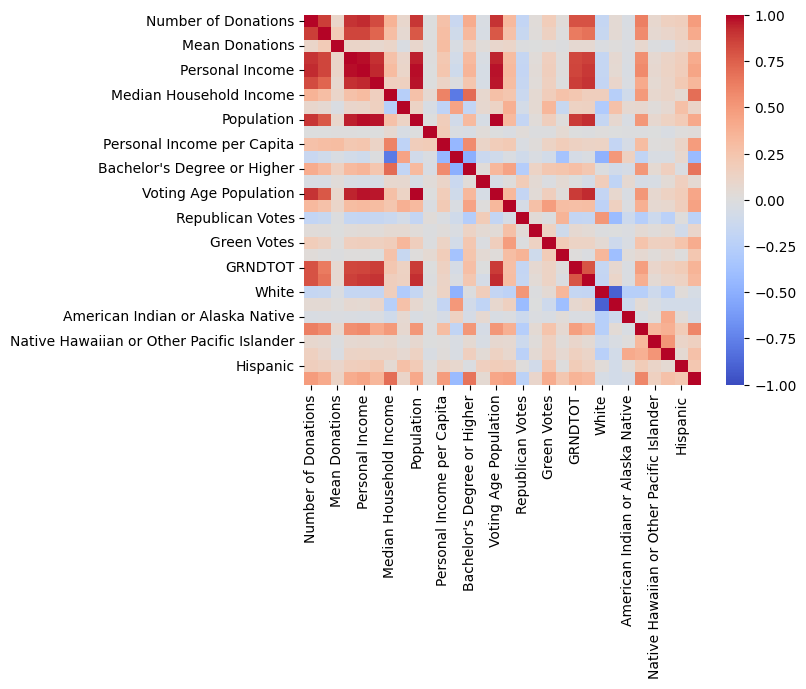

In [ ]:
sns.heatmap(county_statistics.drop("County", axis = 1).corr(), vmin=-1, vmax=1, cmap='coolwarm')

In [ ]:
# Let's try to predict proportion of Democrat voters in each county
county_statistics.drop("County", axis = 1).corr()["Democrat Votes"].sort_values(ascending = False)

,Democrat Votes
Democrat Votes,1.000000
Green Votes,0.482072
RPP,0.459627
Bachelor's Degree or Higher,0.451938
Unemployment Rate,0.377081
Asian,0.375269
Voting Age Population,0.331116
Number of Donations,0.326677
Population,0.319108
Personal Income,0.317137


In [ ]:
# Linear regression
X = county_statistics.drop(columns = ["County", "Democrat Votes", "Republican Votes", "Libertarian Votes", "Green Votes", "Other Votes", "Real GDP per Capita", "Personal Income per Capita", "Mean Donations", "Total Donations", "Number of Donations", "Poverty Count"])
y = county_statistics["Democrat Votes"]
y_test, y_pred, r2, mse = linear_regression(county_statistics, X, y)
print(f"Linear Regression: R^2 = {r2}, MSE = {mse}")

Linear Regression: R^2 = 0.4225185791085735, MSE = 0.013961602014702923


In [ ]:
# Random forest regression
y_test, y_pred, r2, mse = random_forest_regression(X, y)
print(f"Random Forest Regression: R^2 = {r2}, MSE = {mse}")

Random Forest Regression: R^2 = 0.7172664033184786, MSE = 0.006835568747752135


In [ ]:
# Gradient boosting regression
y_test, y_pred, r2, mse = gradient_boost_regression(X, y)
print(f"Gradient Boost Regression: R^2 = {r2}, MSE = {mse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Gradient Boost Regression: R^2 = 0.806120340567787, MSE = 0.004687372694276905


In [ ]:
# Turn back to donations

# Number of donations
county_statistics.drop("County", axis = 1).corr()["Number of Donations"].sort_values(ascending = False)


,Number of Donations
Number of Donations,1.000000
Personal Income,0.925148
Real GDP,0.898614
Voting Age Population,0.898508
Population,0.898056
Total Donations,0.870722
Poverty Count,0.825942
GRNDTOT,0.804119
Overdose Deaths,0.797119
Asian,0.622356


In [ ]:
# Linear regression
X = county_statistics.drop(columns = ["County", "Real GDP per Capita", "Personal Income per Capita", "Mean Donations", "Total Donations", "Number of Donations", "Poverty Count"])
y = county_statistics["Number of Donations"]
y_test, y_pred, r2, mse = linear_regression(county_statistics, X, y)
print(f"Linear Regression: R^2 = {r2}, MSE = {mse}")

Linear Regression: R^2 = 0.7736027610283012, MSE = 159191341.83058


In [ ]:
# Random forest regression
y_test, y_pred, r2, mse = random_forest_regression(X, y)
print(f"Random Forest Regression: R^2 = {r2}, MSE = {mse}")

Random Forest Regression: R^2 = 0.6754616477093673, MSE = 228199319.08749822


In [ ]:
# Gradient boosting regression
y_test, y_pred, r2, mse = gradient_boost_regression(X, y)
print(f"Gradient Boost Regression: R^2 = {r2}, MSE = {mse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Gradient Boost Regression: R^2 = 0.6664966344833374, MSE = 234503085.95284098


In [ ]:
county_statistics.drop("County", axis = 1).corr()["Number of Donations"].sort_values(ascending = False)

,Number of Donations
Number of Donations,1.000000
Personal Income,0.925148
Real GDP,0.898614
Voting Age Population,0.898508
Population,0.898056
Total Donations,0.870722
Poverty Count,0.825942
GRNDTOT,0.804119
Overdose Deaths,0.797119
Asian,0.622356


In [ ]:
# Total Donations

# Linear regression
y = county_statistics["Total Donations"]
y_test, y_pred, r2, mse = linear_regression(county_statistics, X, y)
print(f"Linear Regression: R^2 = {r2}, MSE = {mse}")

Linear Regression: R^2 = 0.6926284821410384, MSE = 35946344111687.24


In [ ]:
# Random forest regression
y_test, y_pred, r2, mse = random_forest_regression(X, y)
print(f"Random Forest Regression: R^2 = {r2}, MSE = {mse}")

Random Forest Regression: R^2 = 0.43913162997907795, MSE = 65592178385845.78


In [ ]:
# Gradient boosting regression
y_test, y_pred, r2, mse = gradient_boost_regression(X, y)
print(f"Gradient Boost Regression: R^2 = {r2}, MSE = {mse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Gradient Boost Regression: R^2 = 0.39893198013305664, MSE = 70293415528831.336


In [ ]:
"""
Our model with just economic factors predicts better for donations
Social factors don't play a huge role in predicting donations, as expected
"""

"\nOur model with just economic factors predicts better for donations\nSocial factors don't play a huge role in predicting donations, as expected\n"

In [ ]:
! pip install Dash

In [ ]:
fips_codes

,ï»¿State,County Name,FIPS State,FIPS County,County,FIPS_FULL
0,Alabama,Autauga,01,001,"AUTAUGA, AL",01001
1,Alabama,Baldwin,01,003,"BALDWIN, AL",01003
2,Alabama,Barbour,01,005,"BARBOUR, AL",01005
3,Alabama,Bibb,01,007,"BIBB, AL",01007
4,Alabama,Blount,01,009,"BLOUNT, AL",01009
...,...,...,...,...,...,...
3137,Wyoming,Sweetwater,56,037,"SWEETWATER, WY",56037
3138,Wyoming,Teton,56,039,"TETON, WY",56039
3139,Wyoming,Uinta,56,041,"UINTA, WY",56041
3140,Wyoming,Washakie,56,043,"WASHAKIE, WY",56043


In [ ]:
# Add fips codes as column
county_statistics = pd.merge(county_statistics, fips_codes, on = "County")
county_statistics

,County,Number of Donations,Total Donations,Mean Donations,Real GDP,Personal Income,Poverty Count,Median Household Income,Unemployment Rate,Population,...,Asian,Native Hawaiian or Other Pacific Islander,Two or More Races,Hispanic,RPP,ï»¿State,County Name,FIPS State,FIPS County,FIPS_FULL
0,"LOS ANGELES, CA",1081102,376146575,347.928849,790016435.0,756659481.0,1365808.0,77356.0,8.9,9663345.0,...,0.160391,0.003745,0.034324,0.485950,112.106331,California,Los Angeles,06,037,06037
1,"MARICOPA, AZ",601518,85828205,142.686013,298240414.0,312350417.0,502224.0,76230.0,4.6,4585871.0,...,0.051415,0.003065,0.034168,0.314059,99.589409,Arizona,Maricopa,04,013,04013
2,"HARRIS, TX",527023,133971644,254.204549,402792333.0,357130669.0,767505.0,63539.0,6.4,4835125.0,...,0.076683,0.001234,0.021336,0.440633,98.834191,Texas,Harris,48,201,48201
3,"COOK, IL",511969,224508918,438.520532,417565020.0,396470899.0,703874.0,72063.0,6.9,5087072.0,...,0.083330,0.000685,0.022697,0.269649,105.577018,Illinois,Cook,17,031,17031
4,"SAN DIEGO, CA",500517,77798986,155.437250,257341197.0,258725373.0,340522.0,90756.0,6.5,3269973.0,...,0.134119,0.005965,0.050616,0.348851,115.091000,California,San Diego,06,073,06073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,"DEUEL, NE",5,1532,306.400000,85853.0,89986.0,207.0,51583.0,2.2,1871.0,...,0.004276,0.000000,0.018172,0.083912,85.430020,Nebraska,Deuel,31,049,31049
2467,"KING, TX",5,6600,1320.000000,63481.0,30342.0,30.0,74890.0,0.9,217.0,...,0.000000,0.004608,0.032258,0.142857,91.120295,Texas,King,48,269,48269
2468,"BORDEN, TX",5,11030,2206.000000,464480.0,89043.0,61.0,69744.0,2.3,572.0,...,0.001748,0.000000,0.026224,0.148601,93.288849,Texas,Borden,48,033,48033
2469,"MCPHERSON, NE",5,205,41.000000,16422.0,32953.0,43.0,54138.0,1.8,383.0,...,0.002611,0.000000,0.010444,0.007833,84.773194,Nebraska,McPherson,31,117,31117


In [ ]:
# Load U.S. counties GeoJSON (replace with actual file path)
import json
with open("/content/drive/My Drive/Kaden/Projects/political_donations/counties.geojson") as f:
    counties_geojson = json.load(f)

In [ ]:
county_statistics["FIPS_FULL"] = county_statistics["FIPS_FULL"].astype(str)

print(county_statistics["FIPS_FULL"])
print([feature["properties"]["GEOID"] for feature in counties_geojson["features"]])

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import json

# Initialize the Dash app
app = Dash(__name__)

# Layout of the app with enhanced styling
app.layout = html.Div([
    html.Div([
        html.H4("Political Contributions by County", style={
            "textAlign": "center", "font-family": "Arial, sans-serif", "color": "#2c3e50", "margin-top": "20px"
        }),
    ], style={"background-color": "#ecf0f1", "padding": "20px"}),

    html.Div([
        dcc.RadioItems(
            id="donation_type",
            options=[
                {"label": "Number of Donations", "value": "Number of Donations"},
                {"label": "Total Donations", "value": "Total Donations"}
            ],
            value="Number of Donations",
            inline=True,
            style={
                "display": "flex", "justify-content": "center", "font-family": "Arial, sans-serif", "font-size": "16px", "color": "#34495e",
                "margin-top": "20px"
            }
        ),
    ], style={"background-color": "#bdc3c7", "padding": "10px"}),

    html.Div([
        dcc.Graph(id="graph", style={"height": "70vh", "margin-top": "20px"}),
    ], style={"padding": "10px", "background-color": "#ecf0f1"})
], style={"font-family": "Arial, sans-serif", "background-color": "#ecf0f1"})

# Callback to update the choropleth map based on the selected donation type
@app.callback(
    Output("graph", "figure"),
    Input("donation_type", "value")
)
def display_choropleth(donation_type):
    # Log transformation of the donation data
    df = county_statistics.copy()
    df[donation_type] = df[donation_type].apply(lambda x: max(x, 1)).apply(np.log)

    # Create the choropleth map with the log-scaled data
    fig = px.choropleth(
        df,
        geojson=counties_geojson,
        locations="FIPS_FULL",               # Column in df with county FIPS codes
        featureidkey="properties.GEOID",  # Key in GeoJSON for county FIPS codes
        color=donation_type,
        color_continuous_scale="Plasma",
        projection="albers usa",
        title=f"{donation_type} (Log Scale) by County"
    )

    # Update map styling
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(
        margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Top margin for title spacing
        title_font={"family": "Arial, sans-serif", "size": 20, "color": "#2c3e50"},
        coloraxis_colorbar=dict(title="Log of " + donation_type, tickvals=[0, df[donation_type].max()]),
        paper_bgcolor="#ecf0f1",
        plot_bgcolor="#ecf0f1"
    )
    return fig

# Run the server
if __name__ == "__main__":
    app.run_server(debug=True)


In [ ]:
# Let's make this map clearer, and also show the top contributors in each state